In [3]:
import urllib.request
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import math
from skimage.measure import compare_ssim as ssim

In [4]:
def show(img):
    plt.figure(figsize = (30,30))
    plt.imshow((img-img.min())/(img.max()-img.min()))
    #plt.imshow(img.astype(np.uint8))

In [5]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

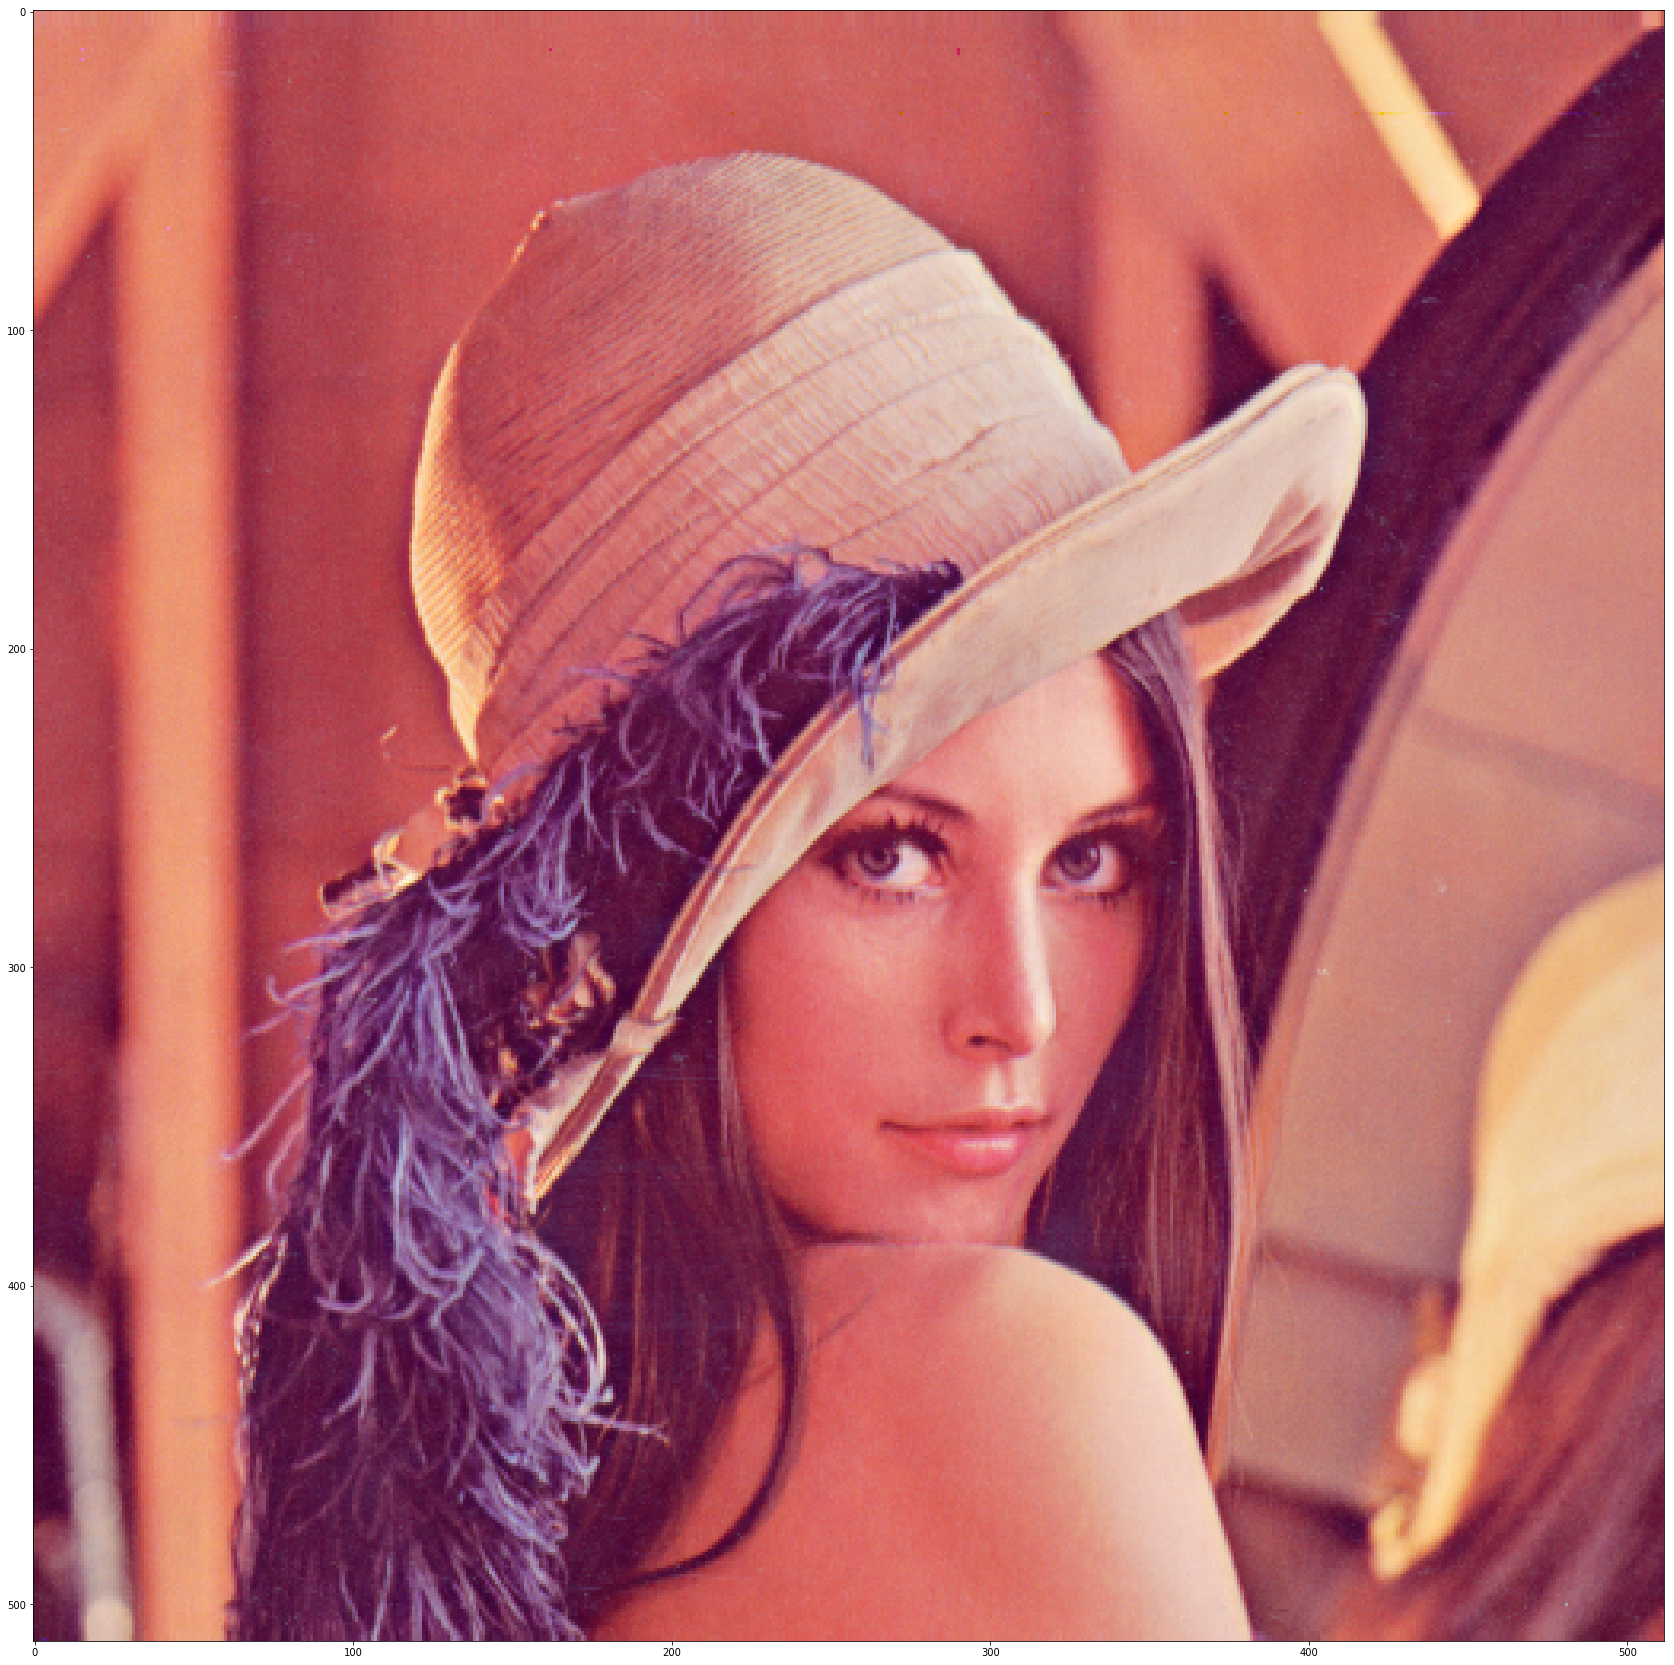

In [6]:
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
image = cv2.cvtColor(BGR, cv2.COLOR_BGR2RGB)
show(image)

In [11]:
# Define the Wavelet kernel

import pywt

print (pywt.wavelist())

# Seleccionamos una en concreto 
#wavelet = 'db9' # http://wavelets.pybytes.com/wavelet/db9/
#wavelet = 'db5' # http://wavelets.pybytes.com/wavelet/db9/
#wavelet = 'haar'
#wavelet='rbio3.5'
#wavelet='rbio1.1'
#wavelet='bior3.5'
wavelet='coif7'
#wavelet='coif5'
mode='per'

def DWT(image):
    return pywt.dwt2(image, wavelet, mode)
  
def iDWT(L, H):
    return pywt.idwt2((L, H), wavelet, mode)

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

In [12]:
# DWT of the image. We define a recursive structure L^l = (L^(l+1), H^(l+1)) where each H is a tuple with 3 subbands. Each component is processed independently.

levels = 5

L = cv2.split(image)
H = levels*[None]
for l in range(levels):
    H[l] = 3*[None]
    for c in range(3):
        L[c], H[l][c] = DWT(L[c])

#show(cv2.merge(L))


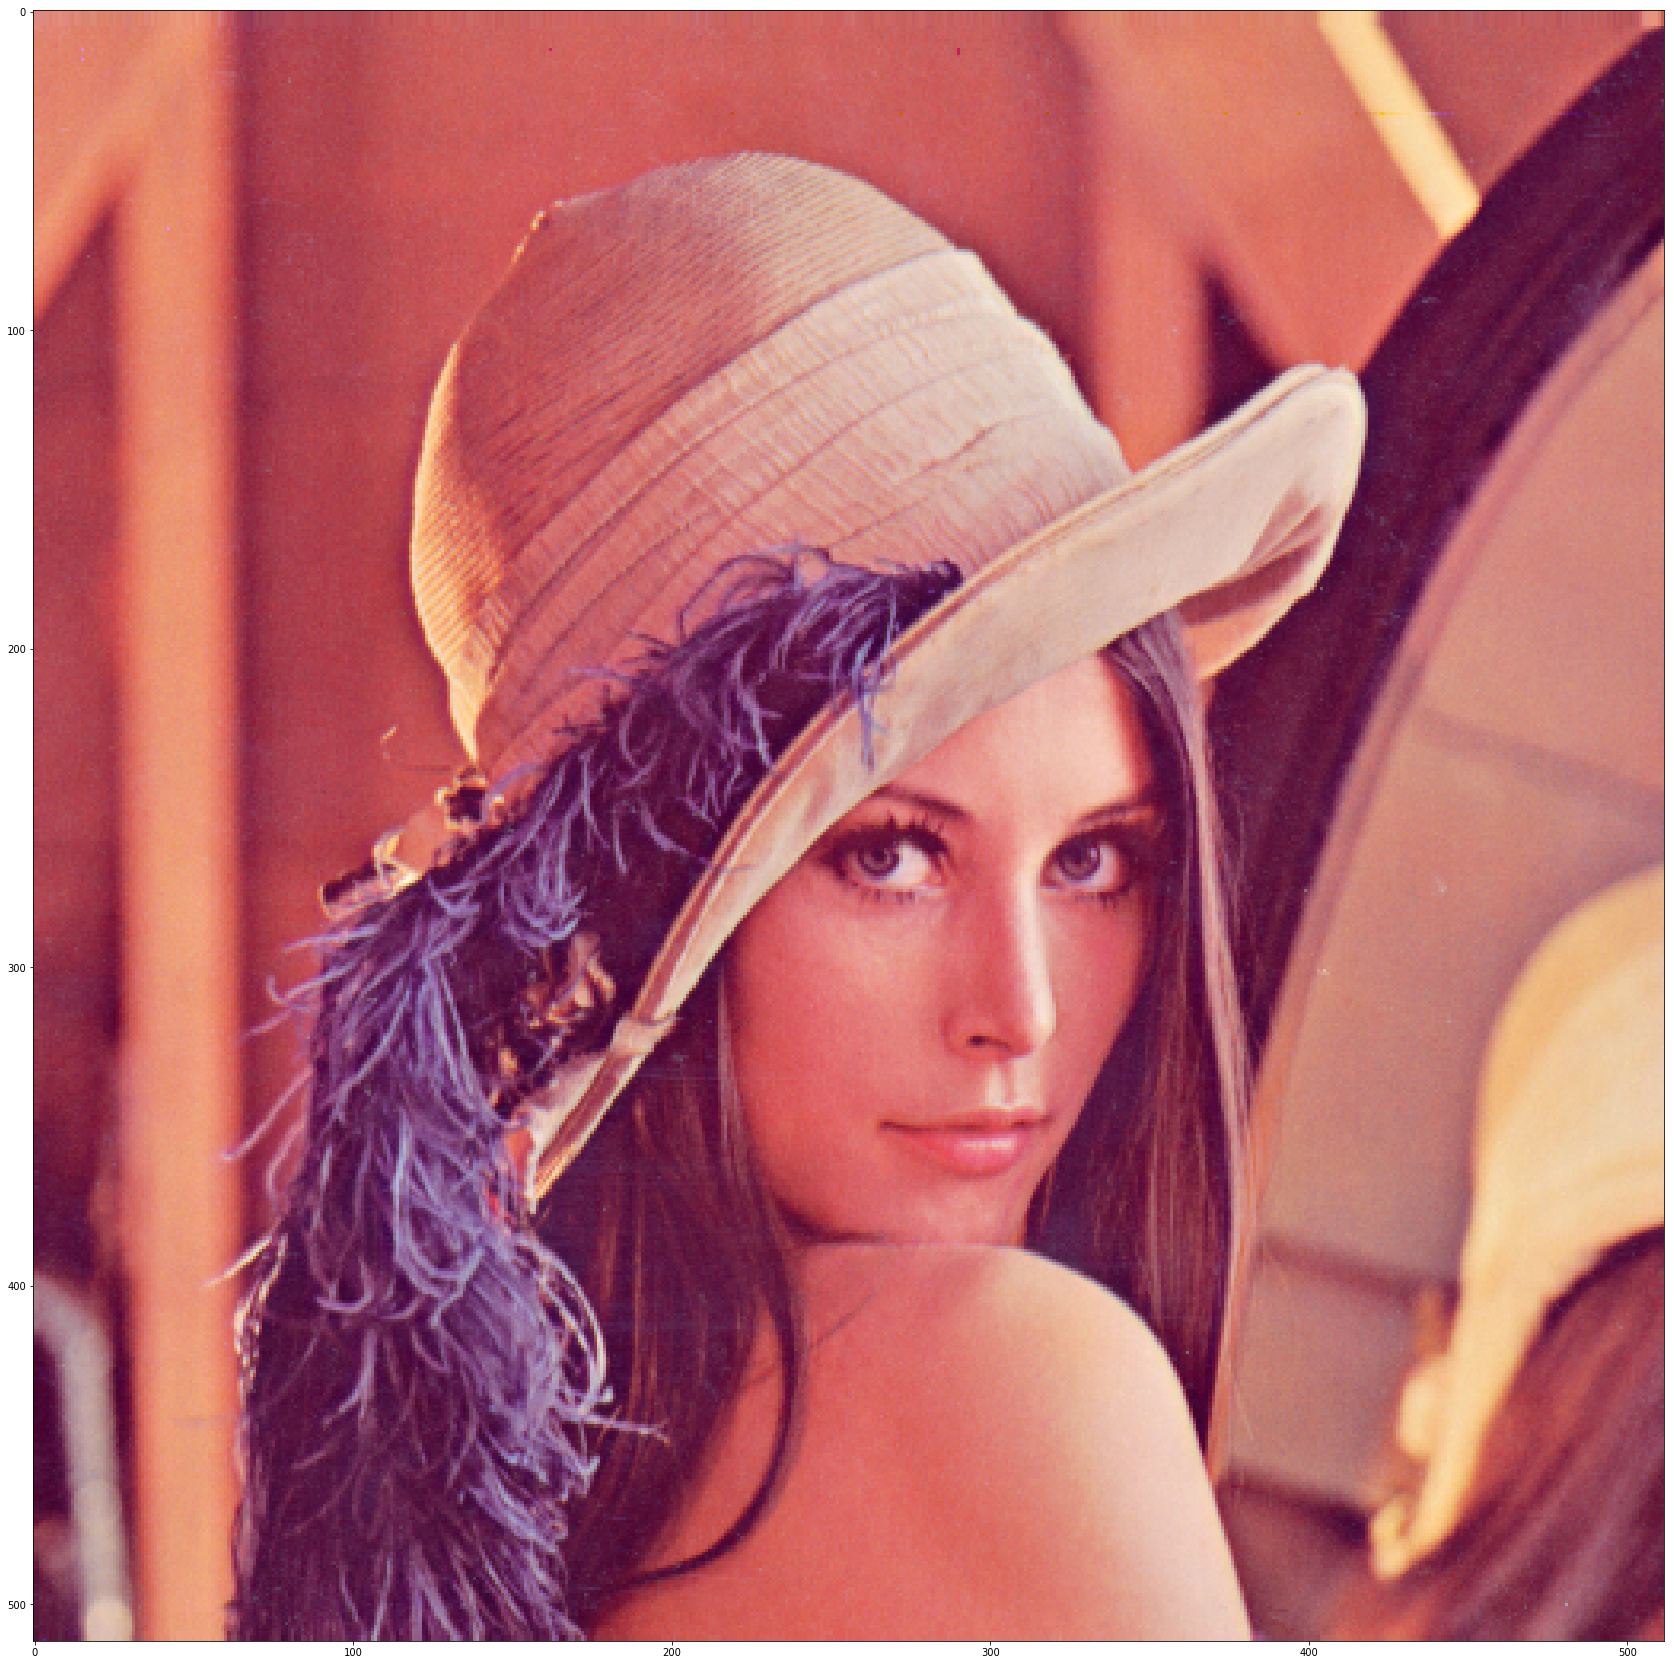

In [13]:
# Debug cell. iDWT (only for the sake of testing the forward transform)

tmp = L.copy()
for l in range(levels-1, -1, -1):
  for c in range(3):
    tmp[c] = iDWT(tmp[c], H[l][c])

show(cv2.merge(tmp))

In [14]:
# iDWT all resolutions. R[] is a list with all the available spatial resolution levels. Thus, if levels = 3, we get 4 different reconstructions with a dyadic resolution.

R = (levels+1)*[None]
R[levels] = L.copy()
for c in range(3):
  R[levels][c] = L[c].copy()
for l in range(levels-1, -1, -1):
  R[l] = 3*[None]
  for c in range(3):
    R[l][c] = iDWT(R[l+1][c], H[l][c])
  #show(cv2.merge(R[l]))

In [15]:
# Interpolate all resolution levels. This is the progressive rendering by spatial resolution levels.
iR = (levels+1)*[None]
for l in range(levels+1):
  iR[l] = R[l].copy()
  for c in range(3):
    iR[l][c] = R[l][c].copy()
  for ll in range(l):
    for c in range(3):
      iR[l][c] = iDWT(iR[l][c], (None, None, None))
  #show(cv2.merge(iR[l]))

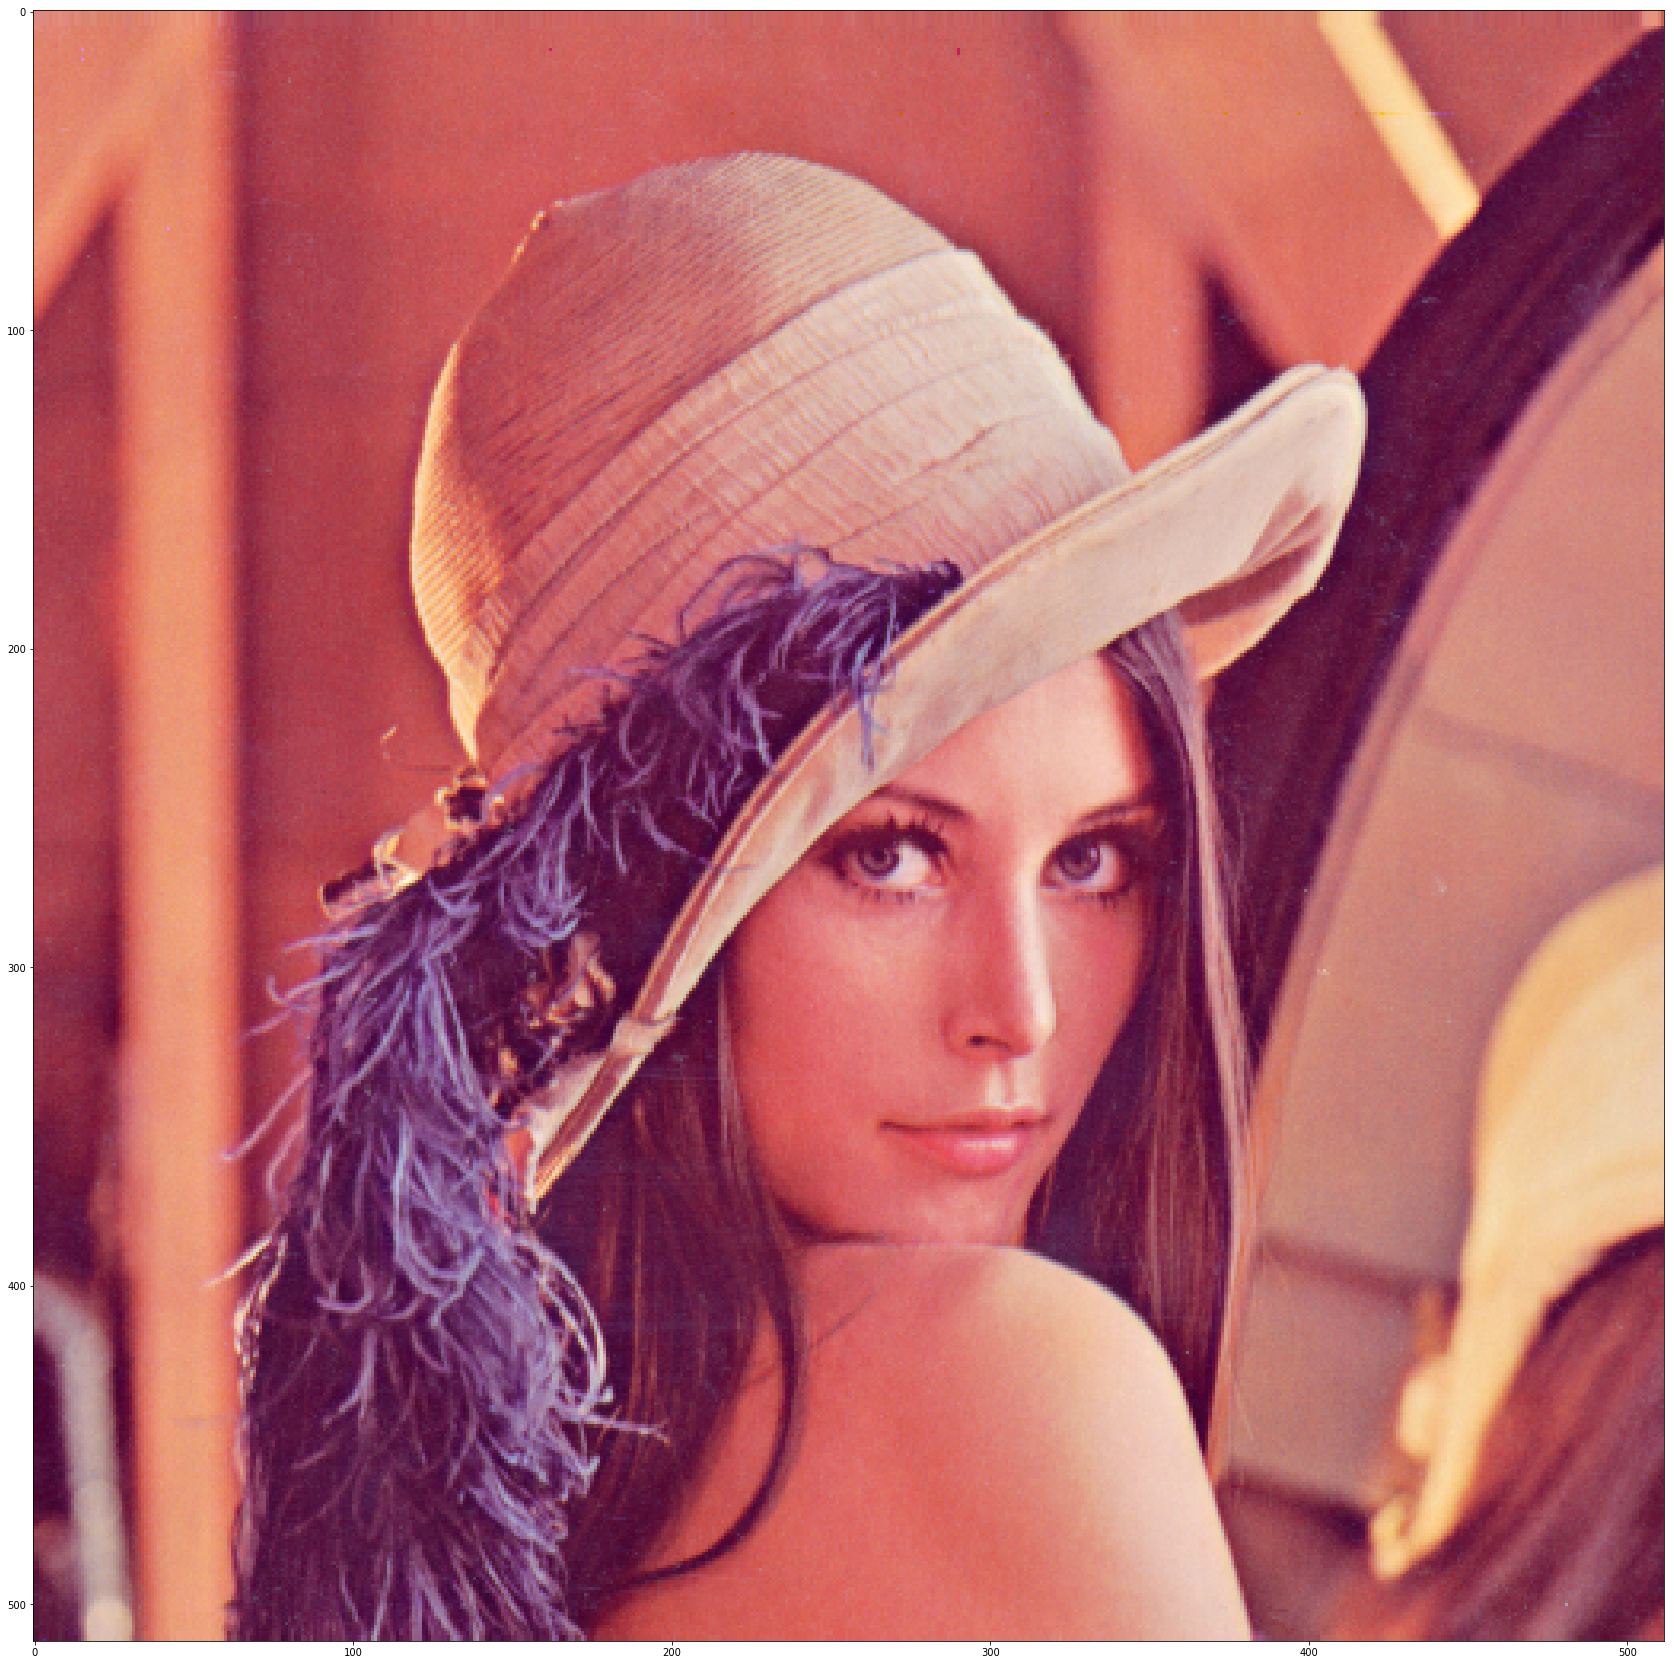

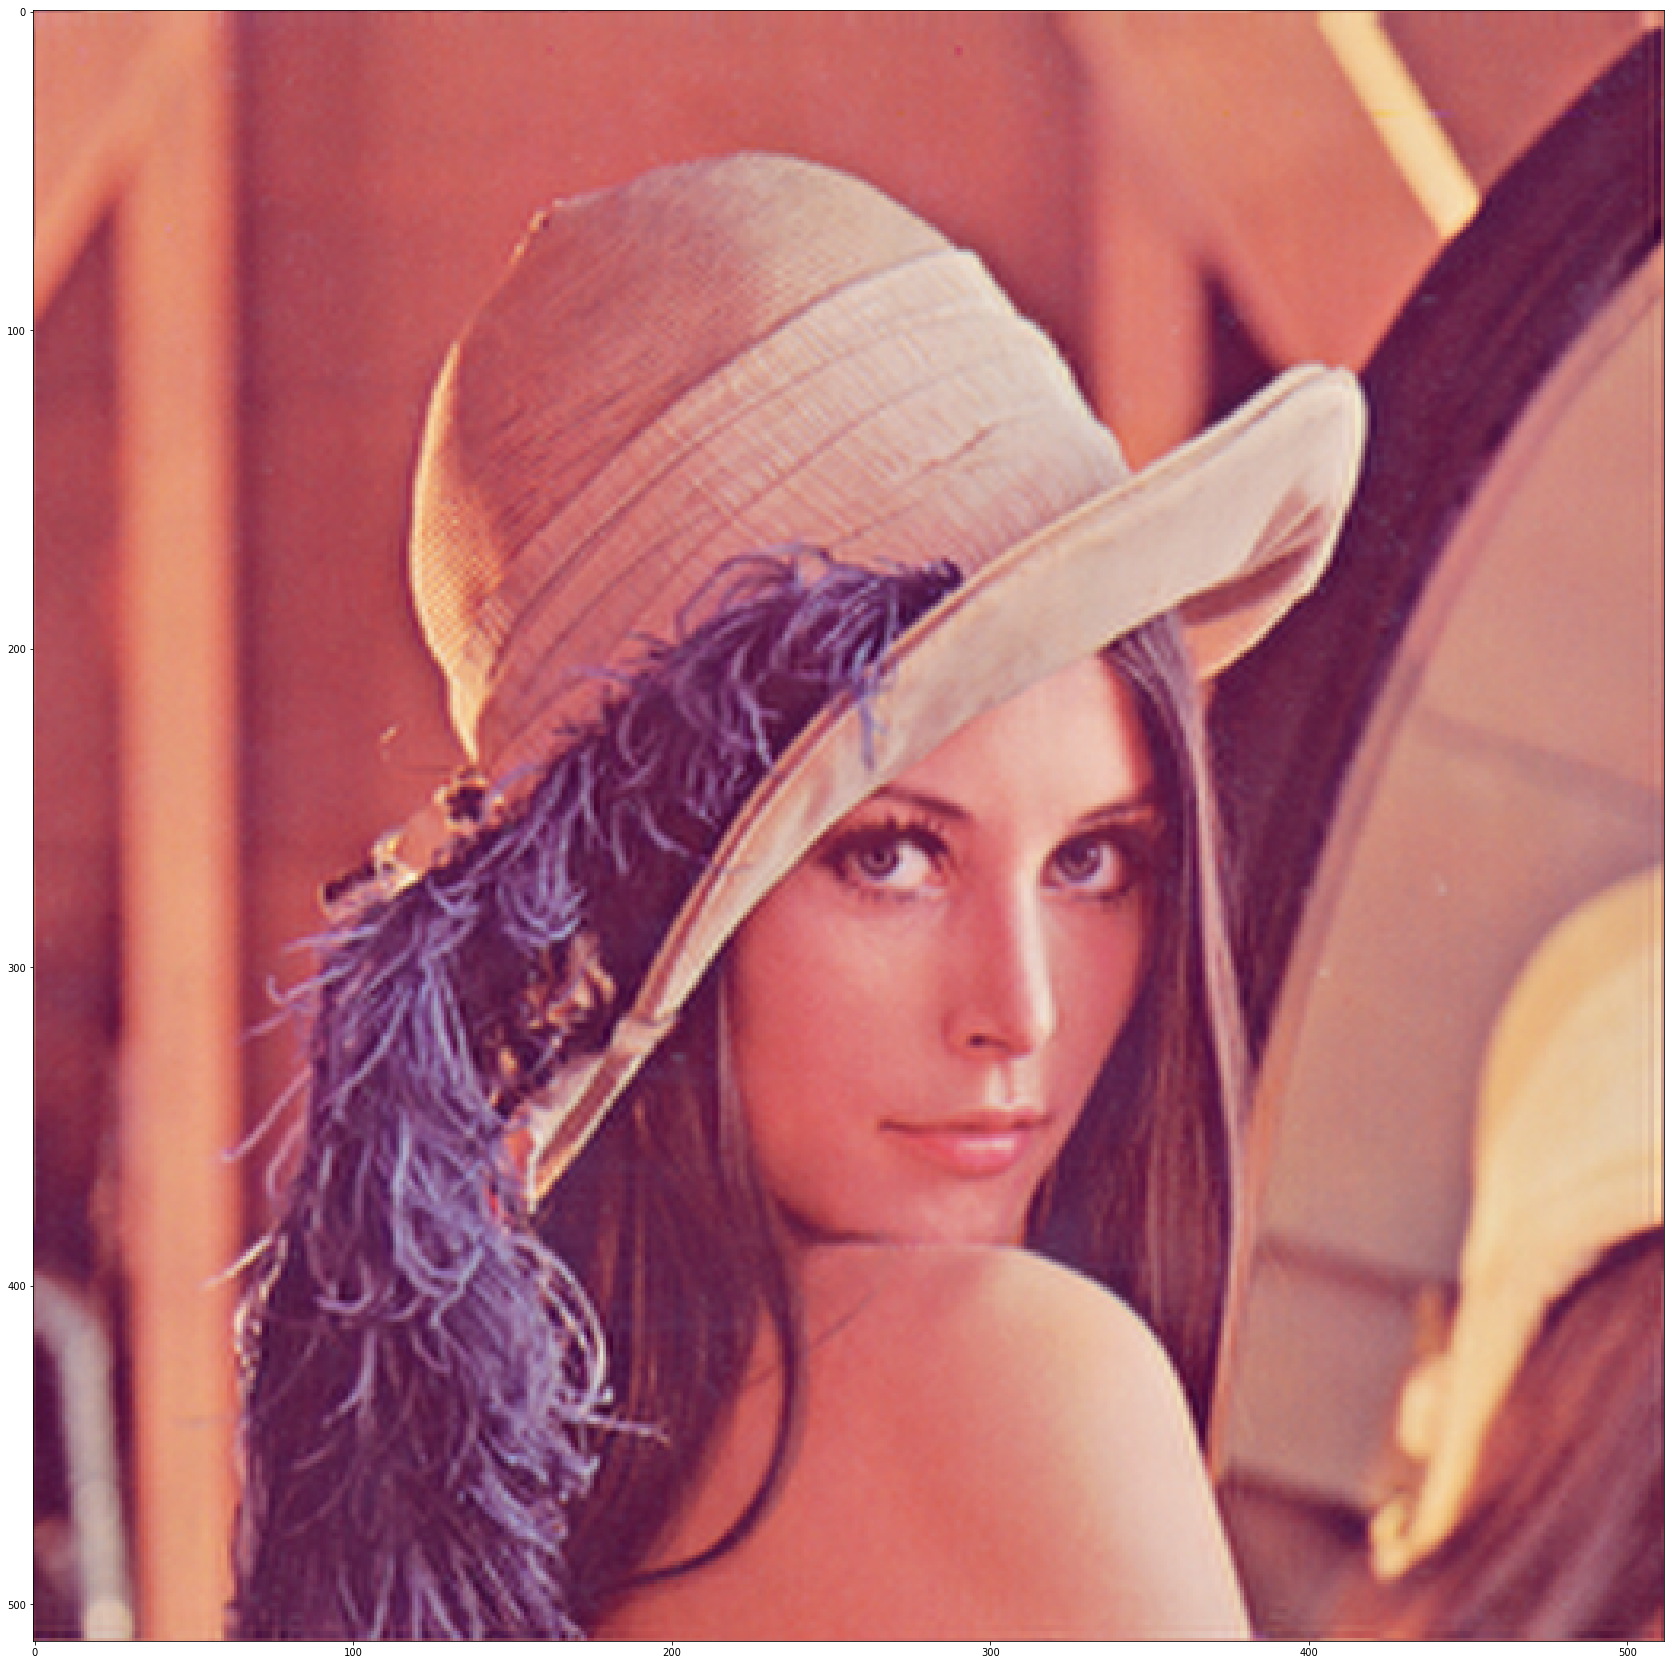

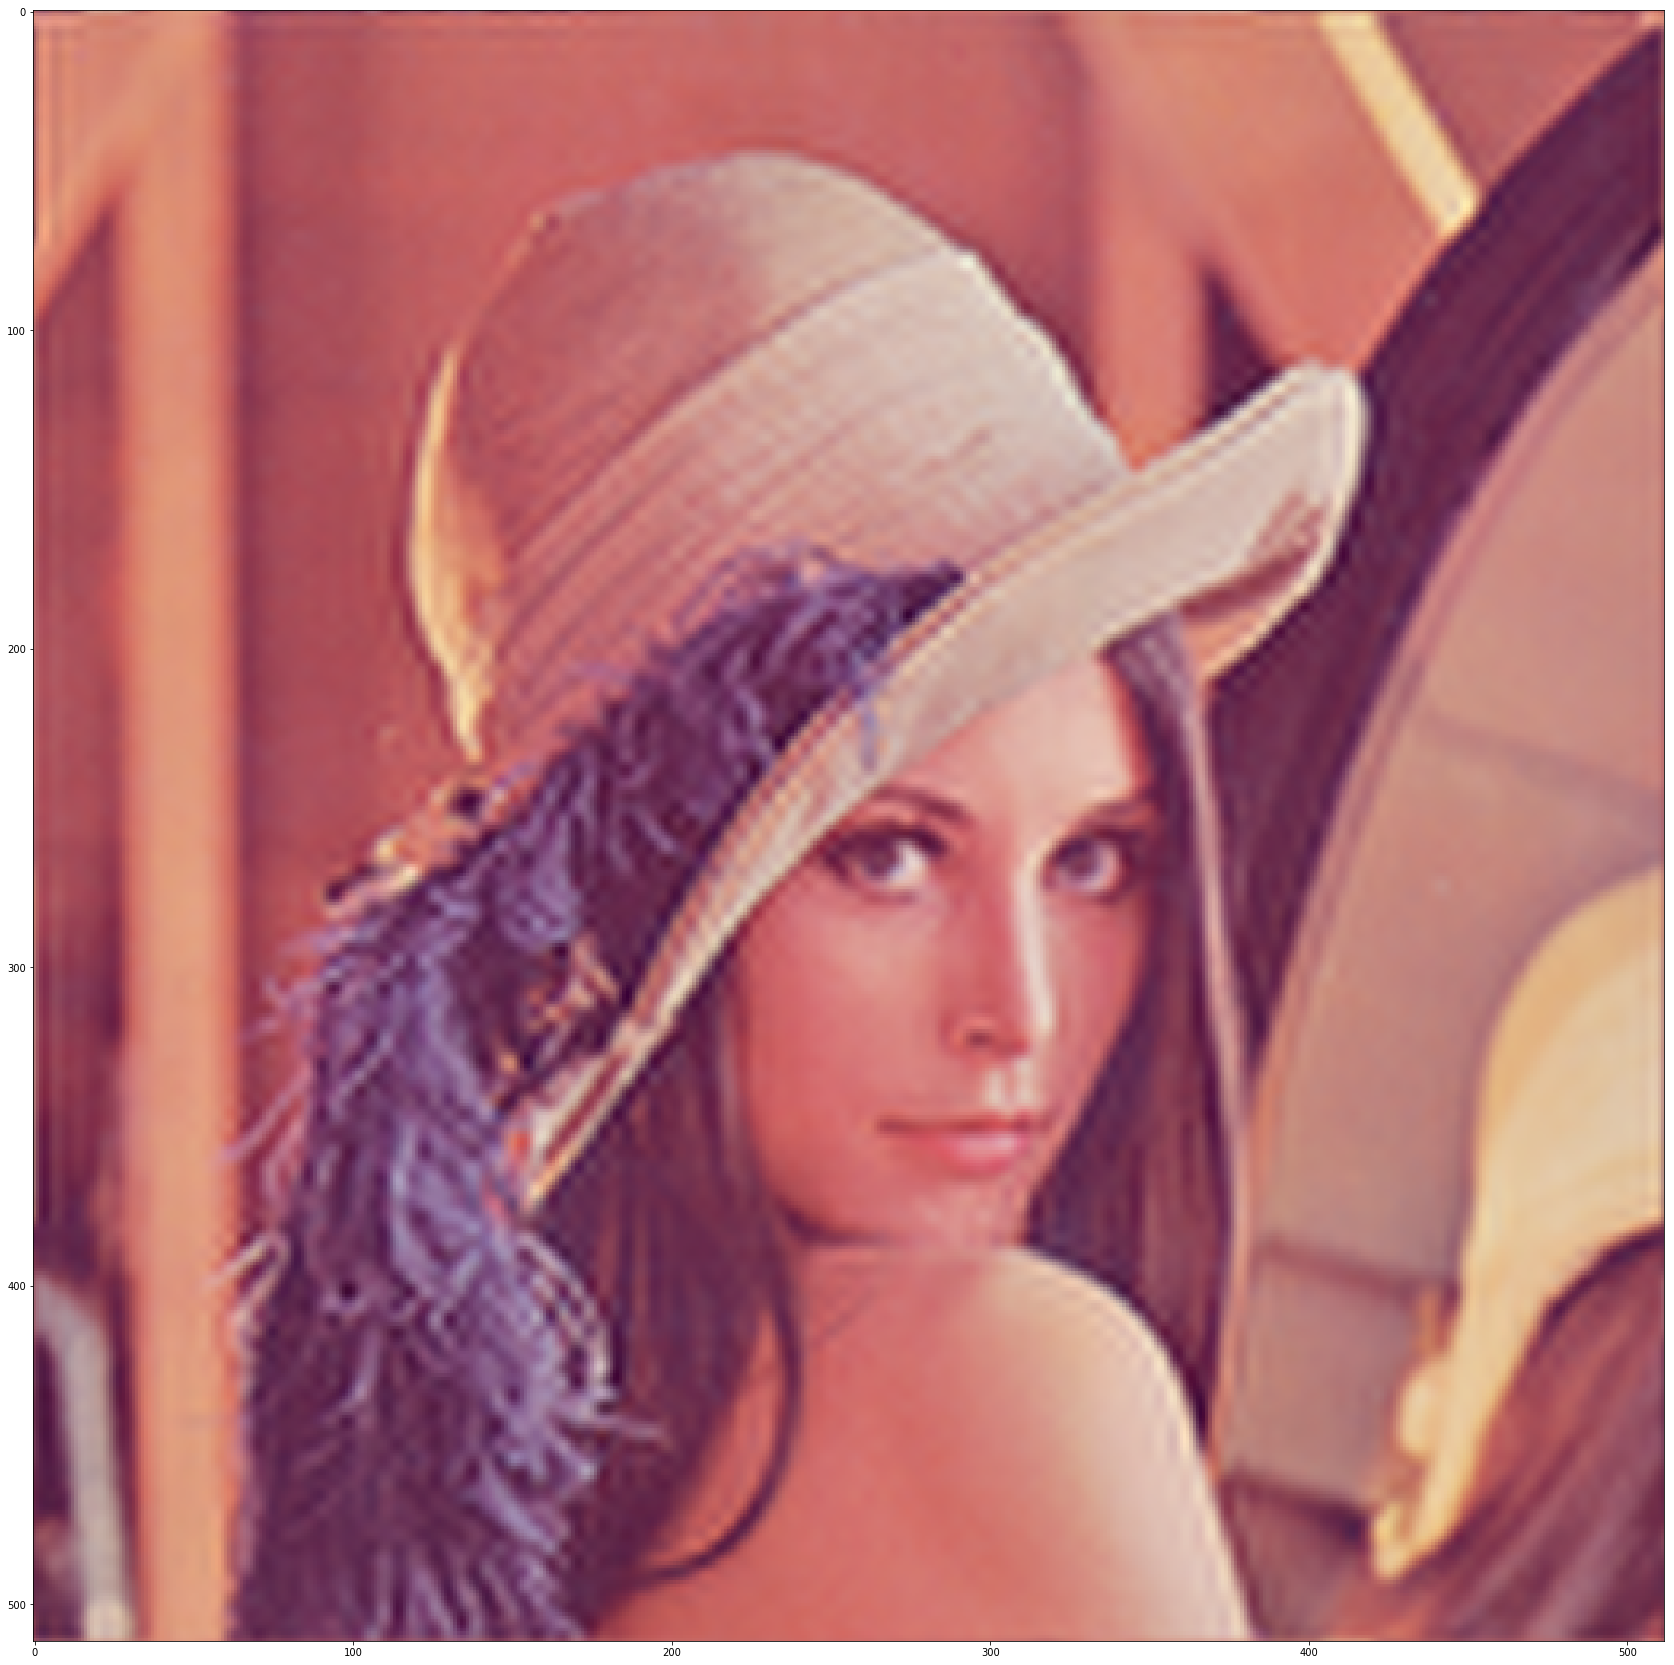

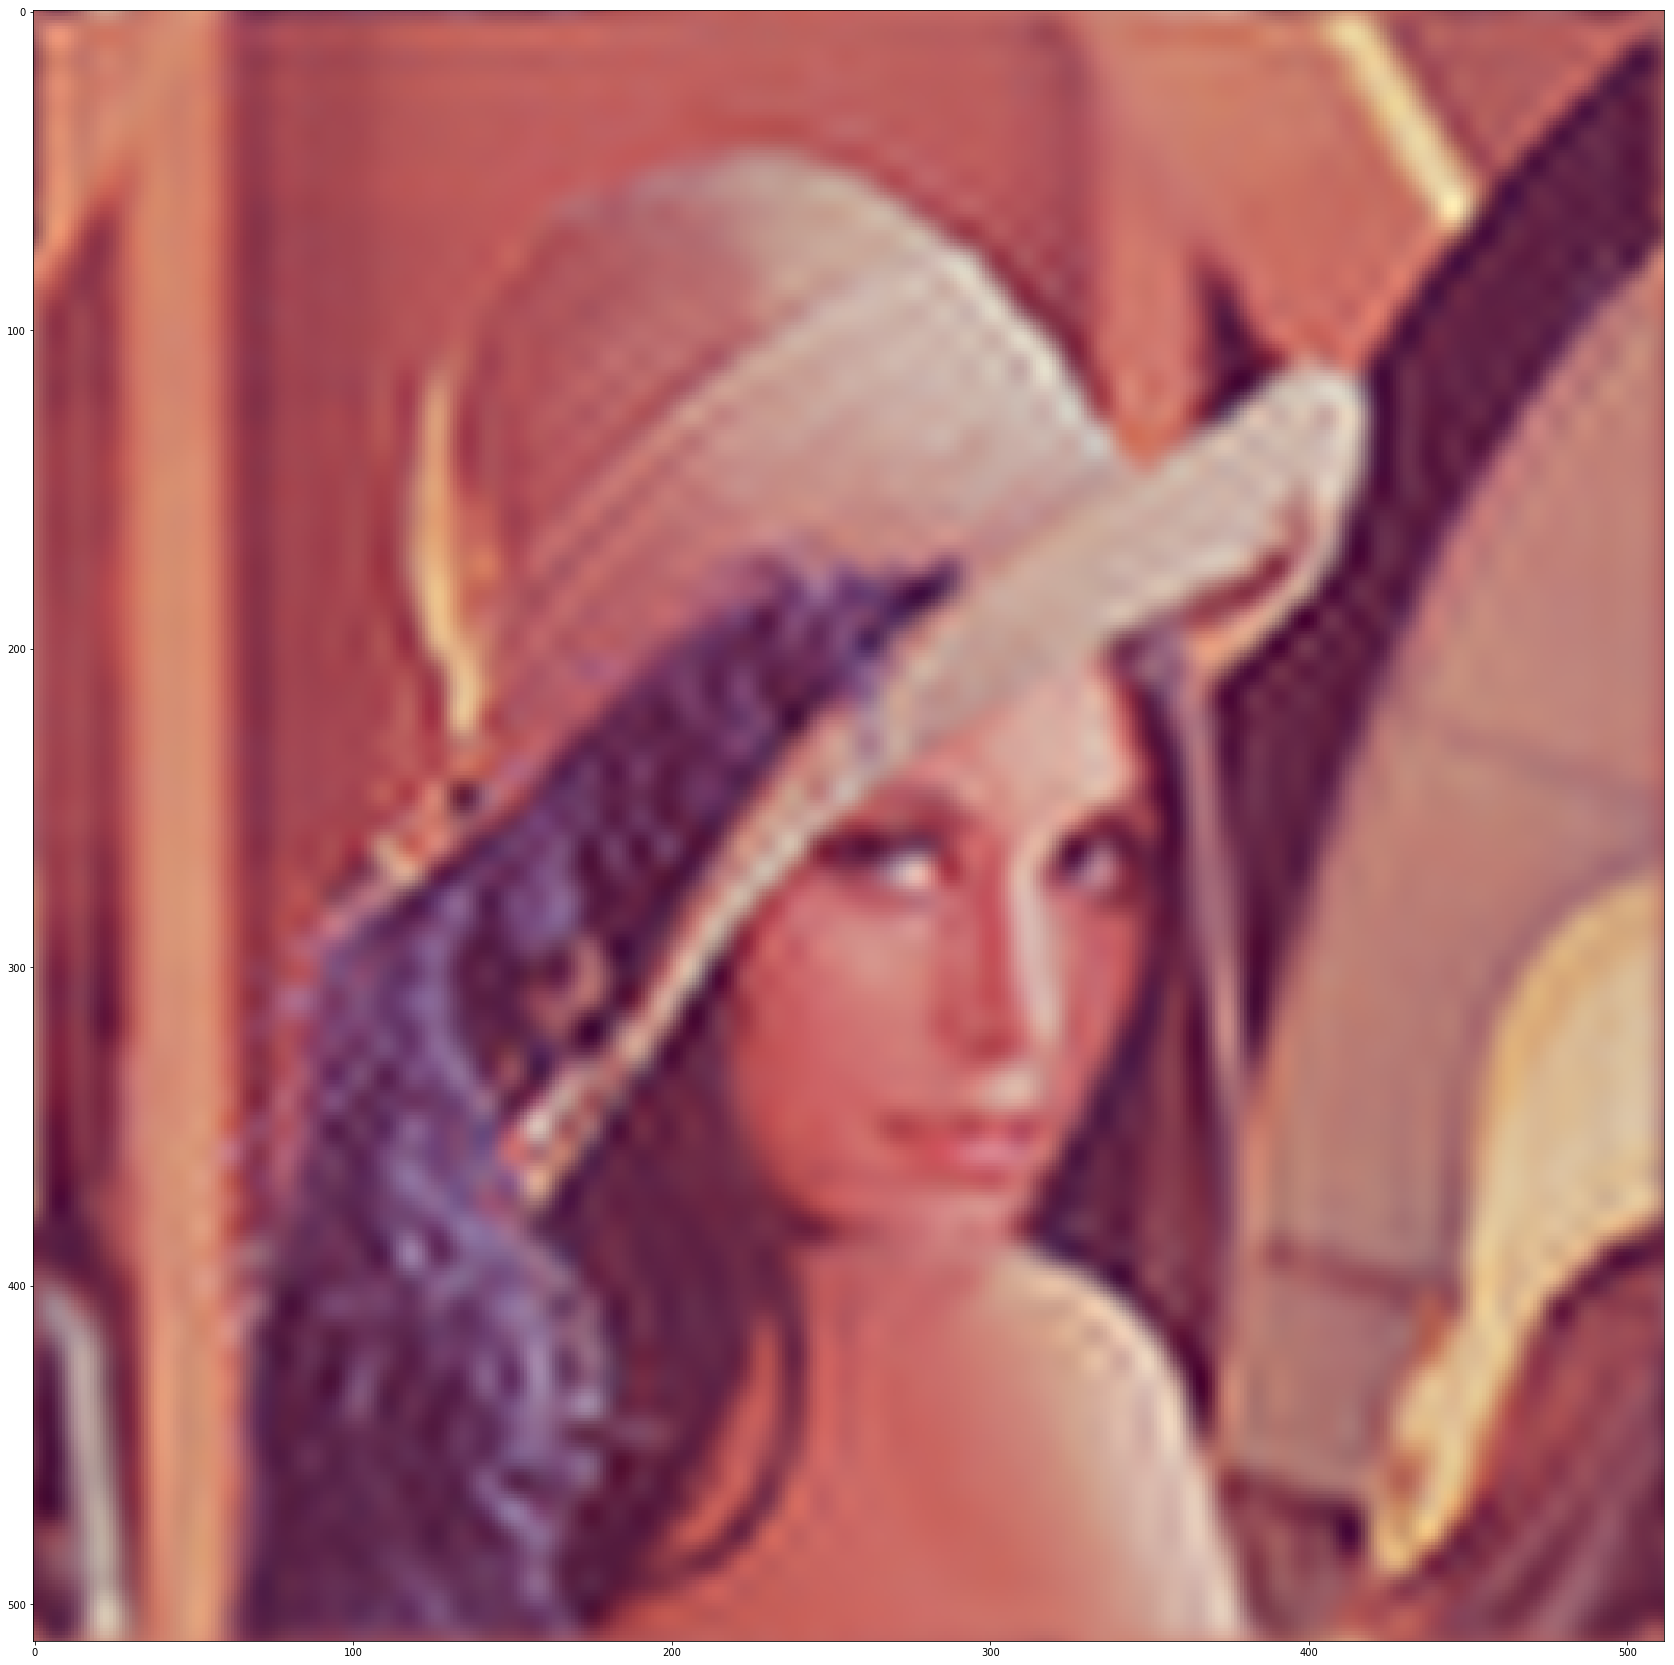

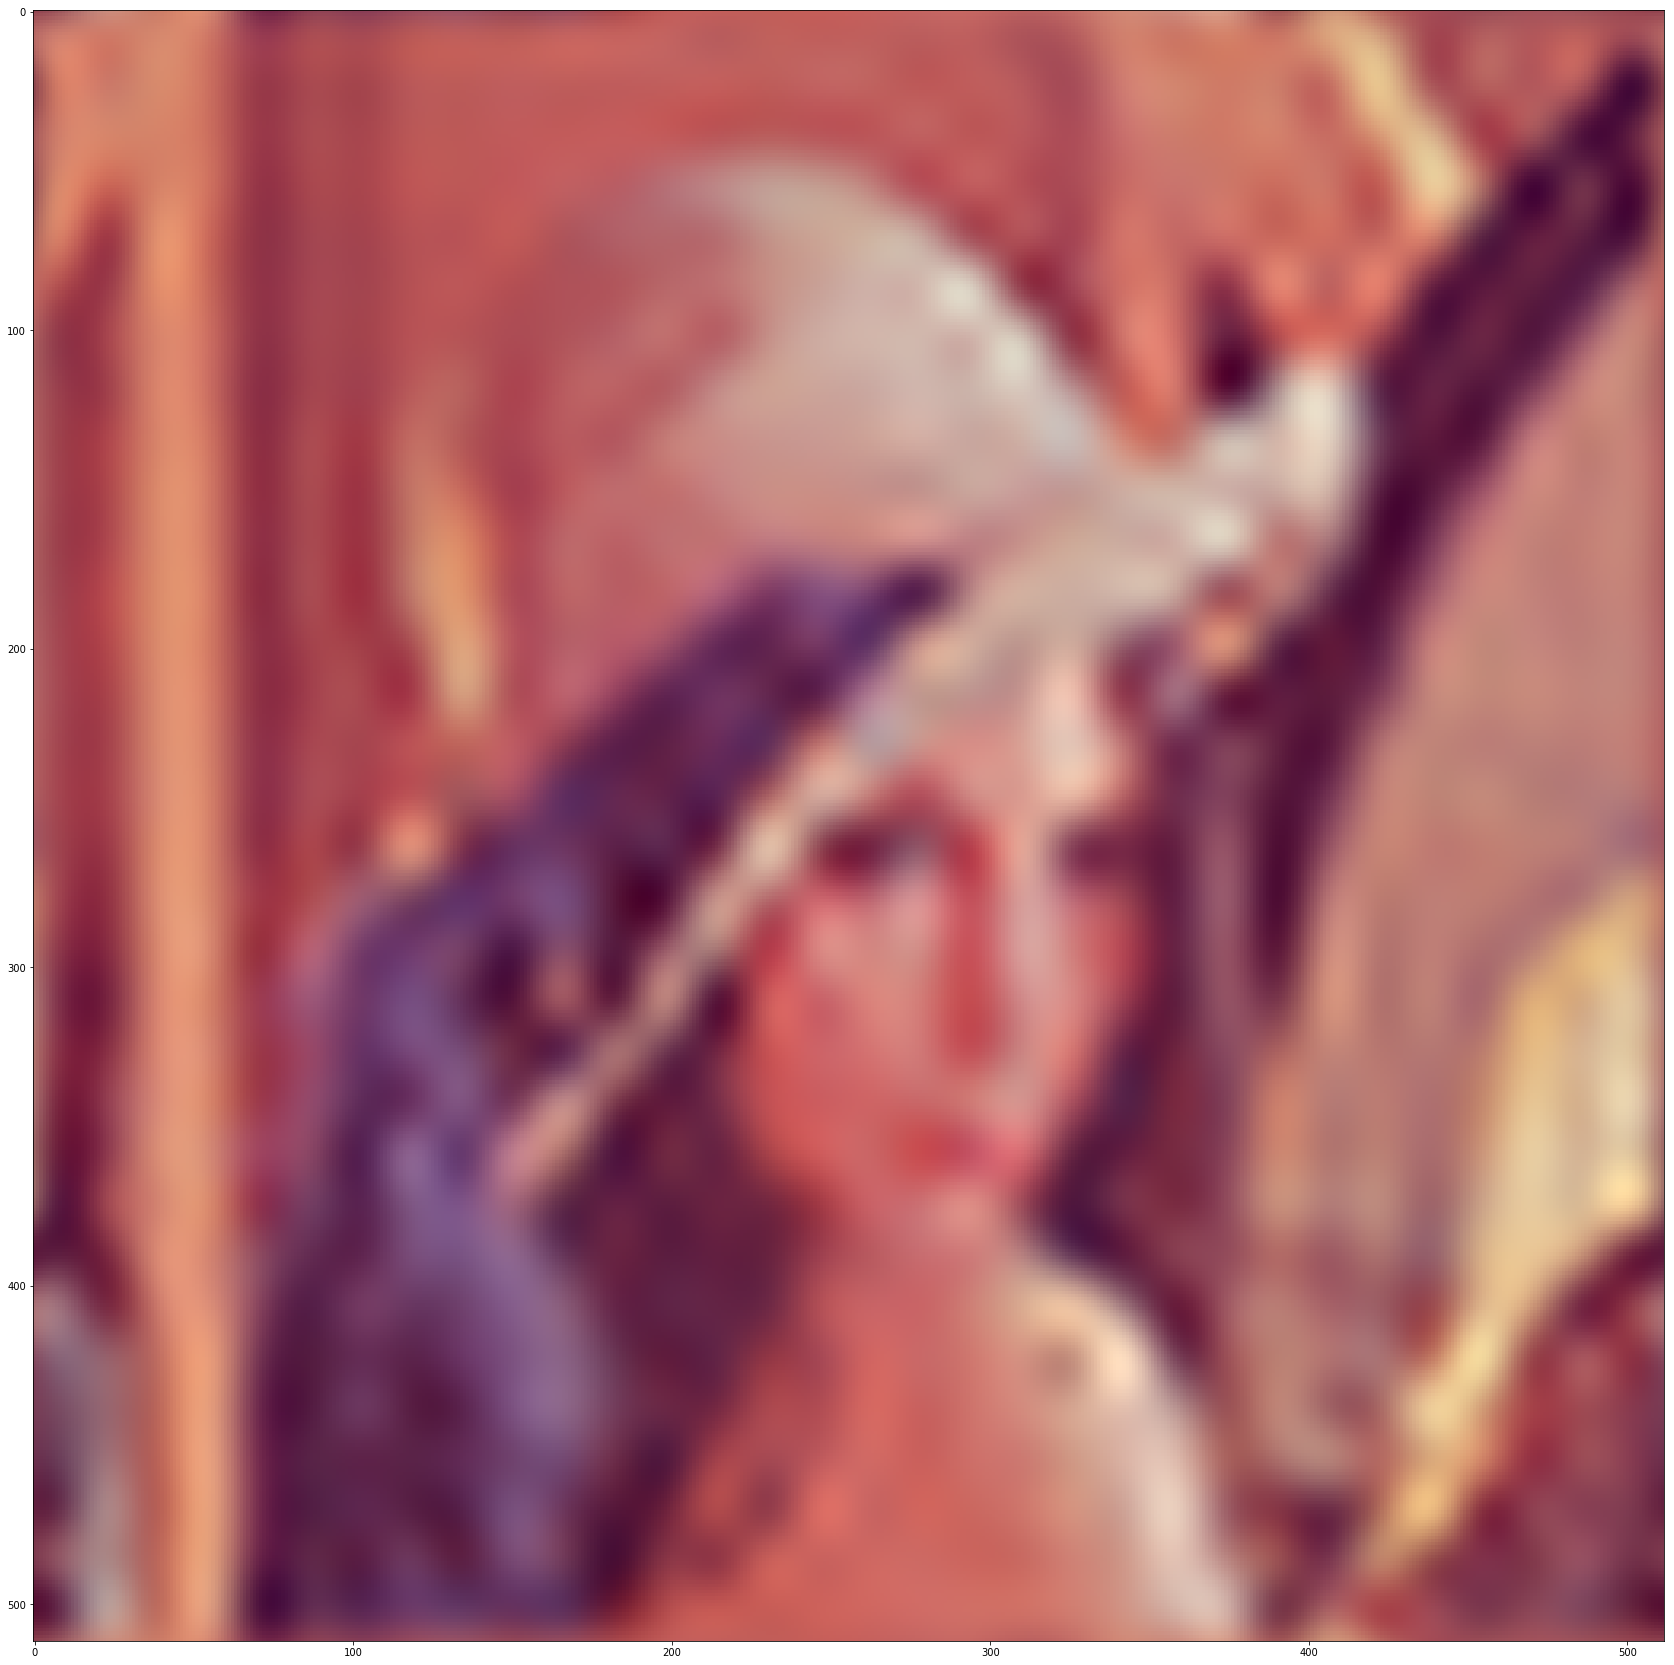

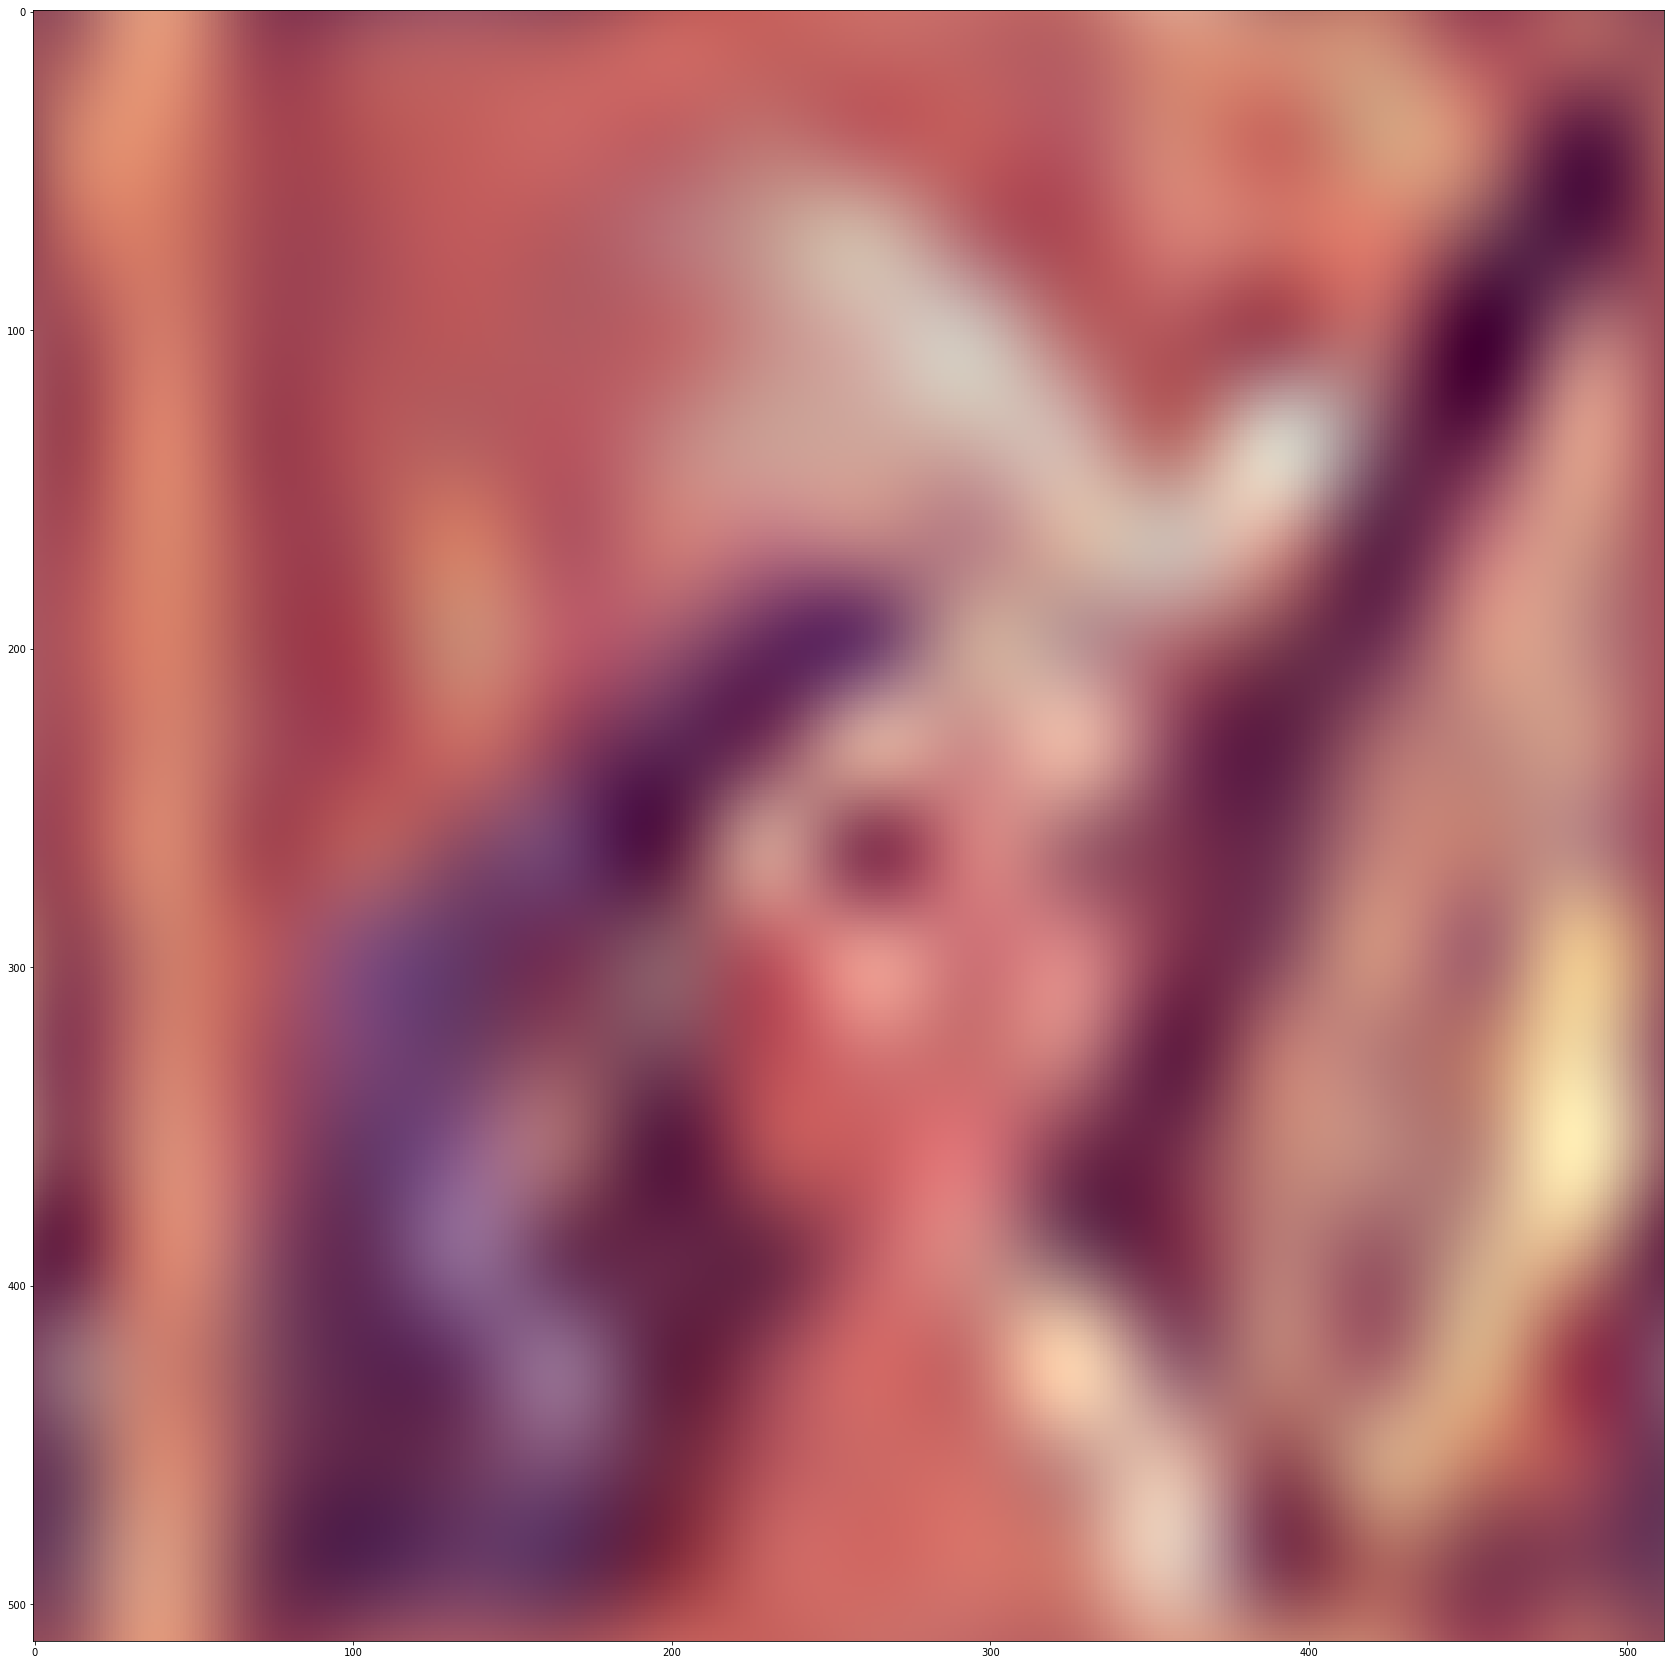

In [16]:
# Show SRLs
for l in range(levels+1):
  show(cv2.merge(iR[l]))

In [17]:
x = 3*[None]
x[0] = 2*iR[1][0]-iR[2][0]
x[1] = 2*iR[1][1]-iR[2][1]
x[2] = 2*iR[1][2]-iR[2][2]

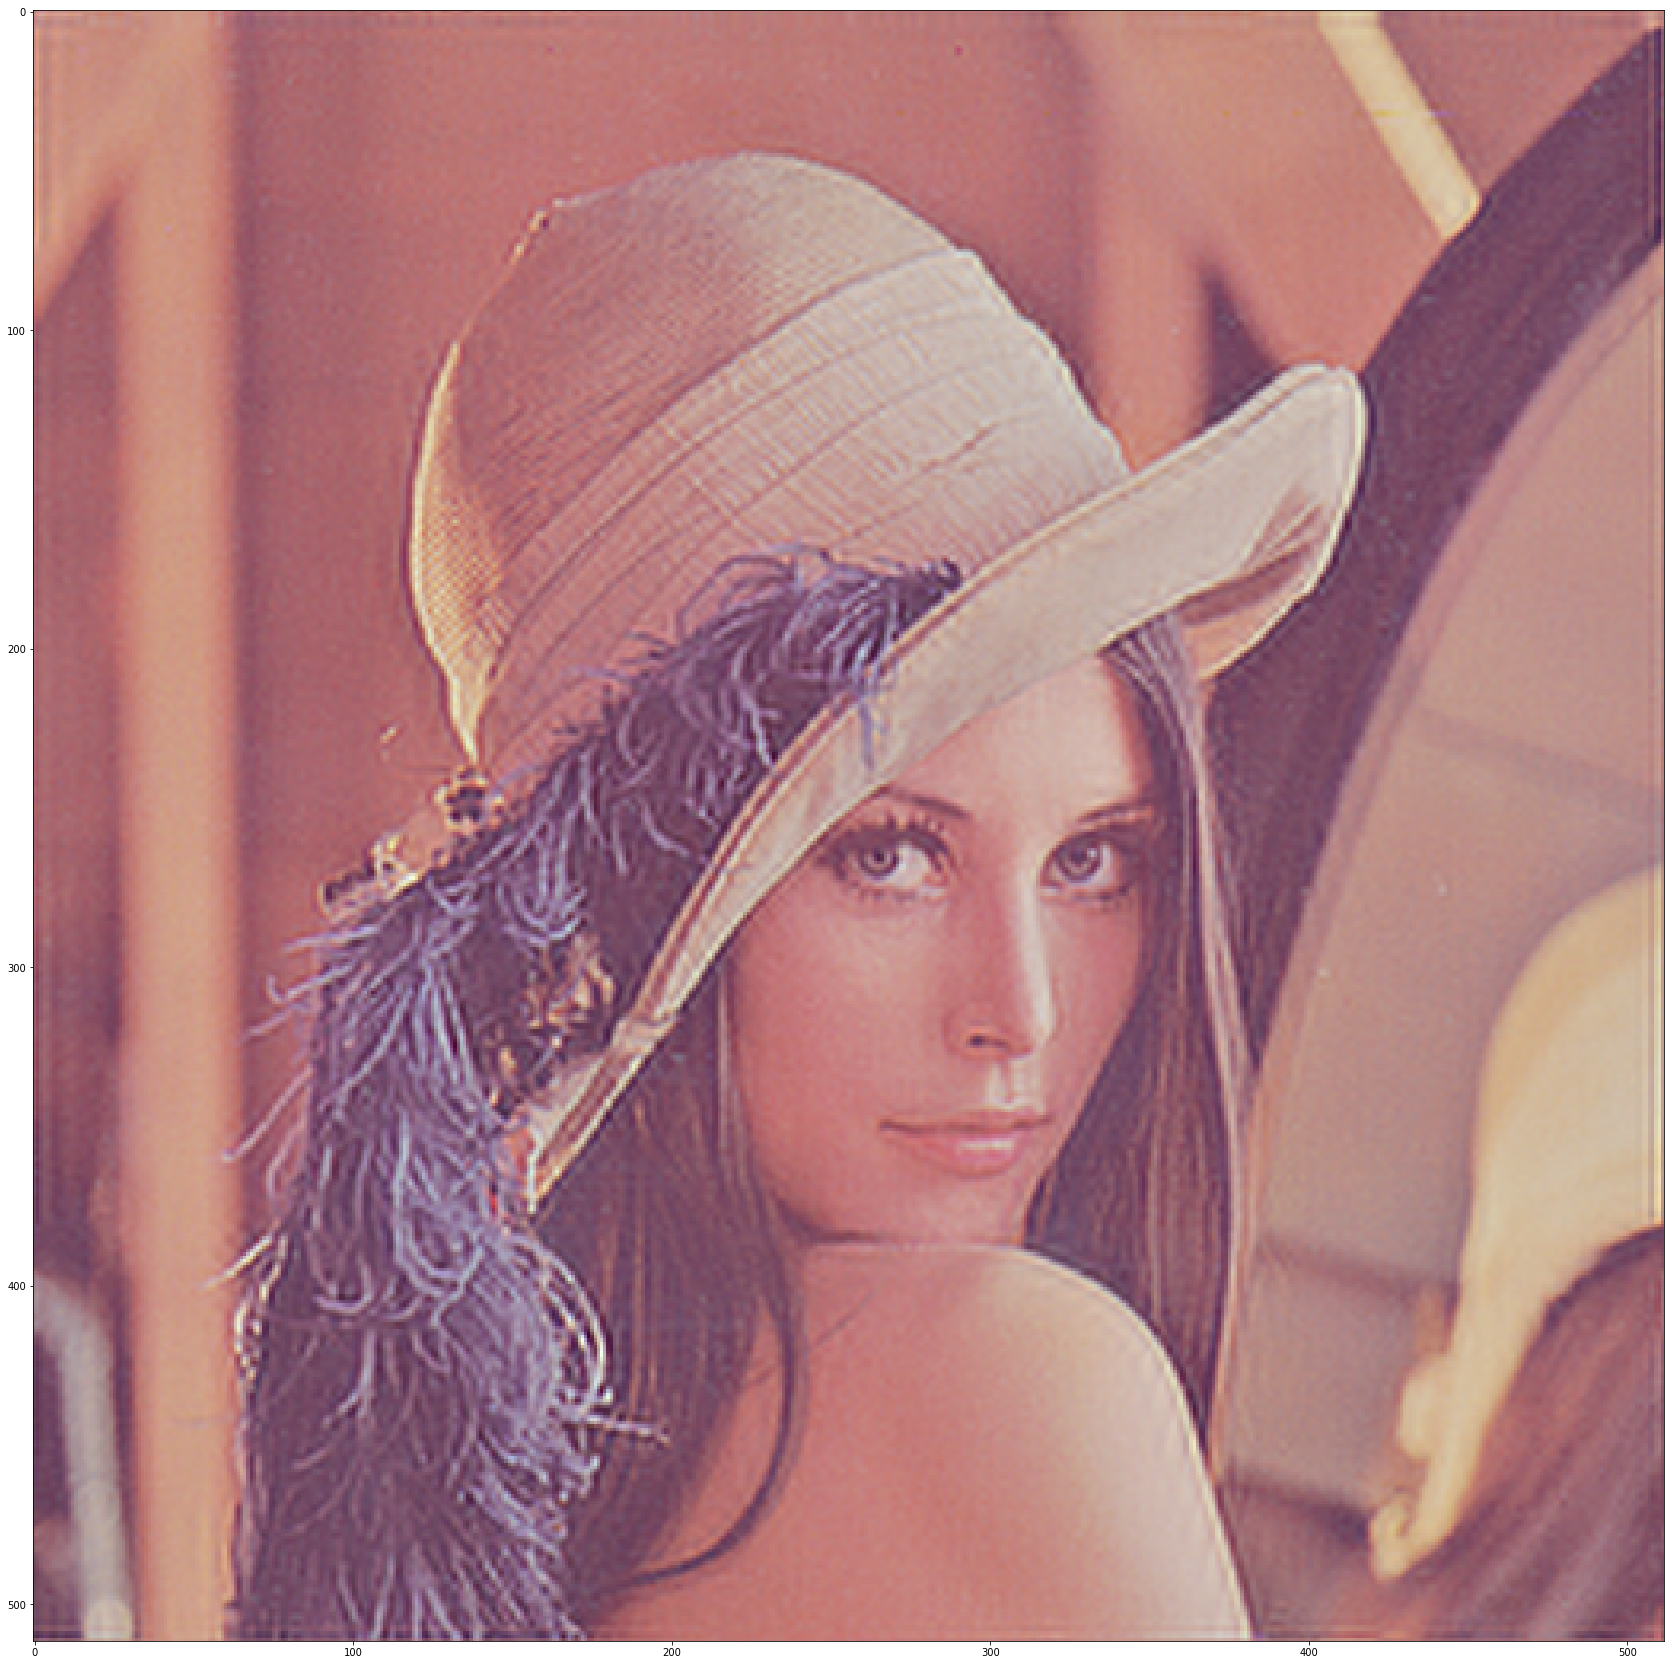

In [19]:
show(cv2.merge(x))